In [1]:
import numpy as np
import scipy.stats as spst
from sif.kernels import BrownianMotionKernel
from sif.models import GaussianProcess
from sif.samplers import multivariate_normal_sampler

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

To begin with let's suppose we're integrating the sin function. The theory of Ito calculus tells us that this is a normal random variable with mean zero and variance expressable in closed form as follows.

In [3]:
T = 2
V = 0.5 * (T - np.sin(T)*np.cos(T))

In [4]:
n_samples = 30000
kernel = BrownianMotionKernel()
X = np.linspace(1e-5, T, num=1000)
X = np.atleast_2d(X).T
C = kernel.cov(X)
m = np.zeros((X.shape[0], ))
samples = multivariate_normal_sampler(m, C, n_samples=n_samples)

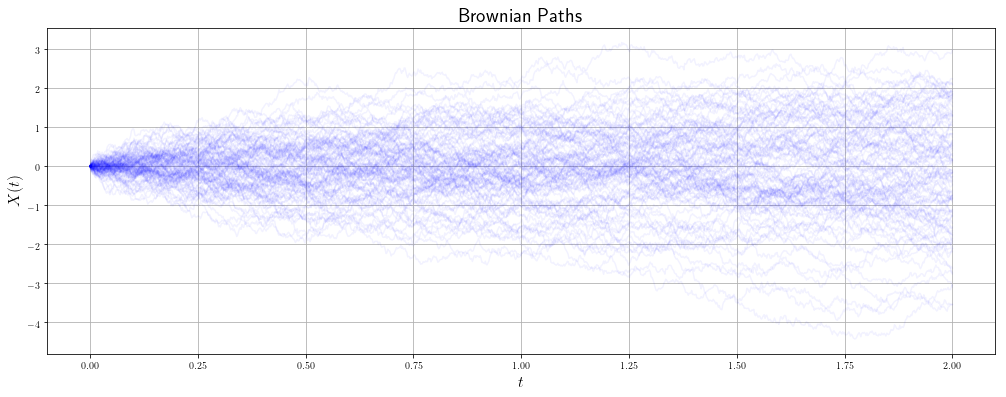

In [5]:
plt.figure(figsize=(17, 6))
for i in range(min(n_samples, 100)):
    plt.plot(X.ravel(), samples[i], "b-", alpha=0.05)
plt.grid()
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$X(t)$", fontsize=16)
plt.title("Brownian Paths", fontsize=20)
plt.show()

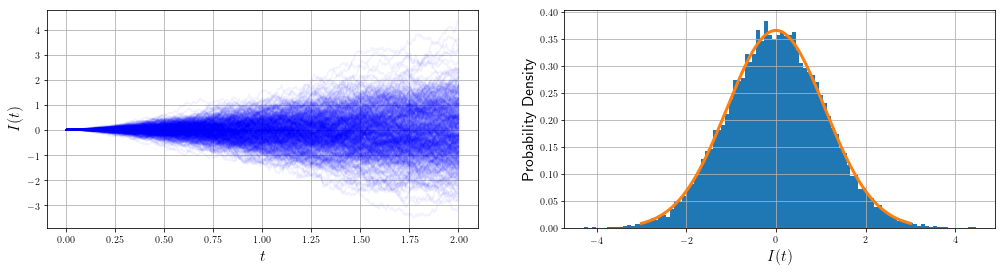

In [6]:
I = np.cumsum(np.sin(X[1:].ravel()) * np.diff(samples, axis=1), axis=1)
r = np.linspace(-3., 3., num=1000)

plt.figure(figsize=(17, 4))
plt.subplot(1, 2, 1)
for i in range(min(n_samples, 500)):
    plt.plot(X.ravel()[1:], I[i], "b-", alpha=0.05)
plt.grid()
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$I(t)$", fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(I[:, -1], bins=100, density=True)
plt.plot(r, spst.norm.pdf(r, 0, np.sqrt(V)), "-", linewidth=3)
plt.grid()
plt.xlabel("$I(t)$", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.show()